In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.signal import chirp, find_peaks, peak_widths

import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 

#import warnings #check your version of scipy and python here as some versions will get warnings 
#warnings.filterwarnings("ignore")

# Load all datasets in 

eleven_light_1 = pd.read_csv('Eleven_11020_Light_Var1_correct.csv')
eleven_light_3 = pd.read_csv('Eleven_11020_Light_Var3_correct.csv')
eleven_light_3_miss = pd.read_csv('Eleven_11020_Light_Var3_misses.csv')       
eleven_light_4 = pd.read_csv('Eleven_11020_Light_Var4_correct.csv')
eleven_light_1_wt = pd.read_csv('Eleven_Light_Var1_WT_correct.csv')
eleven_light_1_wt_miss = pd.read_csv('Eleven_Light_Var1_WT_misses.csv')
eleven_light_2_wt = pd.read_csv('Eleven_11020_Light_Var2_WT_correct.csv')

eleven_ = pd.concat([eleven_light_1, eleven_light_3, eleven_light_3_miss, eleven_light_4, eleven_light_1_wt,
                    eleven_light_1_wt_miss,eleven_light_2_wt]) #7



max_light_1 = pd.read_csv('Max_11022_Light_Var1_correct.csv')
max_light_3 = pd.read_csv('Max_11022_Light_Var3_correct.csv')
max_light_4 = pd.read_csv('Max_11022_Light_Var4_correct.csv')#strike number 2 in this one might need to be removed
max_light_4_miss = pd.read_csv('Max_11022_Light_Var4_misses.csv')
max_light_1_wt = pd.read_csv('Max_11022_Light_Var1_WT_correct.csv') #first 2 strikes also have that upward exoloring snout after 
max_light_1_wt_miss = pd.read_csv('Max_11022_Light_Var1_WT_misses.csv') 
max_light_2_wt = pd.read_csv('Max_11022_Light_Var2_WT_correct.csv')
max_light_3_wt = pd.read_csv('Max_11022_Light_Var3_WT_correct.csv')
max_light_3_wt_miss = pd.read_csv('Max_11022_Light_Var3_WT_misses.csv')

max_ = pd.concat([max_light_1,max_light_3,max_light_4,max_light_4_miss, max_light_1_wt, max_light_1_wt_miss, 
                  max_light_2_wt, max_light_3_wt, max_light_3_wt_miss]) #9



will_light_1 = pd.read_csv('Will_20984_Light_Var1_correct.csv') #might only want to use the first peak here
will_light_1_miss = pd.read_csv('Will_20984_Light_Var1_miss.csv')
will_light_1_miss['Strike_Type']='Miss'
will_light_3 = pd.read_csv('Will_20984_Light_Var3_correct.csv')
will_light_3_miss = pd.read_csv('Will_20984_Light_Var3_misses.csv')
will_light_4 = pd.read_csv('Will_20984_Light_Var4_correct.csv')
will_light_1_wt = pd.read_csv('Will_20984_Light_Var1_WT_correct.csv') 
will_light_1_wt_miss = pd.read_csv('Will_20984_Light_Var1_WT_misses.csv')
will_light_2_wt = pd.read_csv('Will_20984_Light_Var2_WT_correct.csv') 
will_light_2_wt_miss = pd.read_csv('Will_20984_Light_Var2_WT_misses.csv') 
will_light_4_wt = pd.read_csv('Will_20984_Light_Var4_WT_correct.csv') 
will_light_4_wt_miss = pd.read_csv('Will_20984_Light_Var4_WT_misses.csv') 

will_ = pd.concat([will_light_1, will_light_1_miss, will_light_3 , will_light_3_miss ,will_light_4,
                   will_light_1_wt , will_light_1_wt_miss , will_light_2_wt, will_light_2_wt_miss,
                   will_light_4_wt, will_light_4_wt_miss ]) #11




joyce_light_1 = pd.read_csv('Joyce_11021_Light_Var1_correct.csv')
joyce_light_2 = pd.read_csv('Joyce_Light_Var2_correct.csv') 
joyce_light_2_miss = pd.read_csv('Joyce_Light_Var2_miss.csv') #this may be more of a correction replacement..
joyce_light_2_miss['Strike_Type']='Miss'
joyce_light_3 = pd.read_csv('Joyce_11021_Light_Var3_correct.csv')
joyce_light_3_miss = pd.read_csv('Joyce_11021_Light_Var3_misses.csv')
joyce_light_2_wt = pd.read_csv('Joyce_11021_Light_Var2_WT_correct.csv')
joyce_light_2_wt_miss = pd.read_csv('Joyce_11021_Light_Var2_WT_misses.csv')
joyce_light_1_wt = pd.read_csv('Joyce_11021_Light_Var1_WT_correct.csv') #the second half of strike 1 the snout is messed up because she is rearing. so you might want to delete those frames 
joyce_light_4_wt = pd.read_csv('Joyce_11021_Light_Var4_WT_correct.csv')
joyce_light_4_wt_miss = pd.read_csv('Joyce_11021_Light_Var4_WT_misses.csv')
joyce_light_4 = pd.read_csv('Joyce_11021_Light_Var4_correct.csv')
joyce_light_4_miss = pd.read_csv('Joyce_11021_Light_Var4_misses.csv')

joyce_ = pd.concat([joyce_light_1, joyce_light_2, joyce_light_2_miss, joyce_light_3, joyce_light_3_miss, 
                    joyce_light_2_wt, joyce_light_2_wt_miss, joyce_light_1_wt, joyce_light_4_wt,
                    joyce_light_4_wt_miss, joyce_light_4, joyce_light_4_miss]) #12


dustin_light_1 = pd.read_csv('Dustin_20985_Light_Var1_correct.csv')
dustin_light_2 = pd.read_csv('Dustin_20985_Light_Var2_correct.csv')
dustin_light_3 = pd.read_csv('Dustin_20985_Light_Var3_correct.csv')
dustin_light_4 = pd.read_csv('Dustin_20985_Light_Var4_correct.csv')
dustin_light_4_miss = pd.read_csv('Dustin_20985_Light_Var4_misses.csv')
dustin_light_2_wt = pd.read_csv('Dustin_20985_Light_Var2_WT_correct.csv')
dustin_light_1_wt = pd.read_csv('Dustin_Light_Var1_WT_correct.csv') 
dustin_light_1_wt_miss = pd.read_csv('Dustin_Light_Var1_WT_misses.csv')

dustin_ = pd.concat([dustin_light_1 , dustin_light_2, dustin_light_3 , dustin_light_4, dustin_light_4_miss,
                     dustin_light_2_wt, dustin_light_1_wt, dustin_light_1_wt_miss]) #8



billy_light_1 = pd.read_csv('Billy_20986_Light_Var1_correct.csv')
billy_light_1_wt = pd.read_csv('Billy_20986_Light_Var1_WT_correct.csv')
billy_light_1_wt_miss = pd.read_csv('Billy_20986_Light_Var1_WT_misses.csv')
billy_light_2_wt = pd.read_csv('Billy_20986_Light_Var2_WT_correct.csv')
billy_light_2_wt_miss = pd.read_csv('Billy_20986_Light_Var2_WT_misses.csv')
billy_light_2 = pd.read_csv('Billy_20986_Light_Var2_correct.csv')
billy_light_3 = pd.read_csv('Billy_20986_Light_Var3_correct.csv')
billy_light_4_wt = pd.read_csv('Billy_20986_Light_Var4_WT_correct.csv')
billy_light_4_wt_miss = pd.read_csv('Billy_20986_Light_Var4_WT_misses.csv')
billy_light_4 = pd.read_csv('Billy_20986_Light_Var4_correct.csv')

billy_ = pd.concat([billy_light_1, billy_light_1_wt, billy_light_1_wt_miss, billy_light_2_wt, 
                    billy_light_2_wt_miss, billy_light_2, billy_light_3, billy_light_4_wt,
                    billy_light_4_wt_miss, billy_light_4]) #10



lucas_light_1_wt = pd.read_csv('Lucas_20989_Light_Var1_WT_correct.csv')
lucas_light_1_wt_miss = pd.read_csv('Lucas_20989_Light_Var1_WT_misses.csv')
lucas_light_1 = pd.read_csv('Lucas_20989_Light_Var1_correct.csv')
lucas_light_1_miss = pd.read_csv('Lucas_20989_Light_Var1_misses.csv')
lucas_light_2_wt = pd.read_csv('Lucas_20989_Light_Var2_WT_correct.csv')
lucas_light_2_wt_miss = pd.read_csv('Lucas_20989_Light_Var2_WT_misses.csv')
lucas_light_2 = pd.read_csv('Lucas_20989_Light_Var2_correct.csv')
lucas_light_3 = pd.read_csv('Lucas_20989_Light_Var3_correct.csv')
lucas_light_4_wt = pd.read_csv('Lucas_20989_Light_Var4_WT_correct.csv')

lucas_ = pd.concat([lucas_light_1_wt, lucas_light_1_wt_miss, lucas_light_1, lucas_light_1_miss,
                    lucas_light_2_wt, lucas_light_2_wt_miss, lucas_light_2, lucas_light_3,
                    lucas_light_4_wt]) #9



mike_light_1 = pd.read_csv('Mike_20982_Light_Var1_correct.csv')
mike_light_1_miss = pd.read_csv('Mike_20982_Light_Var1_misses.csv')
mike_light_2_wt = pd.read_csv('Mike_20982_Light_Var2_WT_correct.csv')
mike_light_2 = pd.read_csv('Mike_20982_Light_Var2_correct.csv')
mike_light_4_wt_miss = pd.read_csv('Mike_20982_Light_Var4_WT_Miss.csv')
mike_light_4 = pd.read_csv('Mike_20982_Light_Var4_correct.csv')
mike_light_4_miss = pd.read_csv('Mike_20982_Light_Var4_misses.csv')

mike_ = pd.concat([mike_light_1, mike_light_1_miss, mike_light_2_wt, mike_light_2, mike_light_4_wt_miss,
                   mike_light_4, mike_light_4_miss]) #7


# NO or yes for wt 
# and Miss or Correct for strikes 


In [2]:
def add_scaling(one_possum,scale):
    one_possum['RFLy_disp_scale'] = one_possum['RFLy_disp'] / scale
    one_possum['RHL_disp_scale'] =  one_possum['RHLy_disp'] / scale
    one_possum['Snouty_disp_scale'] = one_possum['Snouty_disp'] / scale
    one_possum['Tailtipy_disp_scale'] =  one_possum['Tailtipy_disp'] / scale
    
    one_possum['RFLx_cumsum_scale'] =  one_possum['RFLx_cumsum'] / scale
    one_possum['RHLx_cumsum_scale'] =  one_possum['RHLx_cumsum'] / scale
    
    one_possum['RFLx_scale'] =  one_possum['RFLx'] / scale
    one_possum['RHLx_scale'] =  one_possum['RHLx'] / scale
    one_possum['Snoutx_scale'] =  one_possum['Snoutx'] / scale
    
add_scaling(eleven_,1.277) # real is 1.277
add_scaling(joyce_,1.225) # real is 1.225
add_scaling(max_,1.044) # real is 1.044
add_scaling(dustin_,1.272) # real is 1.272
add_scaling(will_,1.264) # real is 1.264
add_scaling(billy_,1.482) # real is 1.482
add_scaling(mike_,1.297) # real is 1.297
add_scaling(lucas_,1.2) # real is 1.2

In [3]:
agg_male = pd.concat([dustin_,mike_,will_,lucas_,billy_])
agg_female = pd.concat([eleven_,joyce_,max_])

agg_male_correct = agg_male.loc[agg_male['Strike_Type']=='Correct']
agg_female_correct = agg_female.loc[agg_female['Strike_Type']=='Correct']

agg_male_miss = agg_male.loc[agg_male['Strike_Type']=='Miss']
agg_female_miss = agg_female.loc[agg_female['Strike_Type']=='Miss']

agg_data = pd.concat([agg_male_correct,agg_female_correct])
agg_miss = pd.concat([agg_male_miss,agg_female_miss])

agg_correct_and_miss_list = [dustin_light_1,dustin_light_2,eleven_light_1,joyce_light_1,max_light_1,will_light_1,
                      joyce_light_2,eleven_light_1_wt,joyce_light_1_wt,max_light_1_wt,dustin_light_2_wt,
                     joyce_light_2_wt,max_light_2_wt,max_light_3_wt,joyce_light_4_wt,dustin_light_3,
                     eleven_light_3,joyce_light_3,max_light_3,will_light_3,dustin_light_4,will_light_4,
                     eleven_light_4,max_light_4,eleven_light_2_wt,joyce_light_4,will_light_1_wt,
                     will_light_2_wt,will_light_4_wt,dustin_light_1_wt,will_light_1_miss,joyce_light_2_miss,eleven_light_1_wt_miss,max_light_1_wt_miss,
                       joyce_light_2_wt_miss,max_light_3_wt_miss,joyce_light_4_wt_miss,eleven_light_3_miss,
                        will_light_3_miss,dustin_light_4_miss,max_light_4_miss,
                        joyce_light_3_miss,joyce_light_4_miss,will_light_1_wt_miss,
                       will_light_2_wt_miss,will_light_4_wt_miss,dustin_light_1_wt_miss,billy_light_1_wt,
                             billy_light_1_wt_miss,billy_light_1,billy_light_2_wt,billy_light_2_wt_miss,billy_light_2,
                            billy_light_3,billy_light_4_wt,billy_light_4_wt_miss,billy_light_4,lucas_light_1_wt,
                            lucas_light_1_wt_miss,lucas_light_1,lucas_light_1_miss,lucas_light_2_wt,
                             lucas_light_2_wt_miss,lucas_light_2,lucas_light_3,lucas_light_4_wt,mike_light_1,
                            mike_light_1_miss,mike_light_2_wt,mike_light_2,mike_light_4_wt_miss,mike_light_4,
                            mike_light_4_miss]



agg_data['LHL_vs_Snout'] = agg_data['Snoutx'] - agg_data['LHLx']
agg_data['RHL_vs_Snout'] = agg_data['Snoutx'] - agg_data['RHLx']
agg_data['RFL_vs_Snout'] = agg_data['Snoutx'] - agg_data['RFLx']
agg_data['LFL_vs_Snout'] = agg_data['Snoutx'] - agg_data['LFLx']
agg_data['RFL_vs_LHL'] = agg_data['RFLx'] - agg_data['LHLx']
agg_data['RFL_vs_RHL'] = agg_data['RFLx'] - agg_data['RHLx']

agg_data['RFL_vs_RHL_scale'] = agg_data['RFLx_scale'] - agg_data['RHLx_scale']
agg_data['RHL_vs_Snout_scale'] = agg_data['Snoutx_scale'] - agg_data['RHLx_scale']

agg_data['RFL_vs_RHL'] = agg_data['RFLx'] - agg_data['RHLx']
agg_data['snout_vs_tail'] = agg_data['Snouty_disp'] - agg_data['Tailtipy_disp']

agg_data['RFL_vs_Snout_scale'] = agg_data['Snoutx_scale'] - agg_data['RFLx_scale']


whiskers_only = agg_data.loc[agg_data['Whiskers']=='yes']

whisker_trim_only = agg_data.loc[agg_data['Whiskers']=='NO']

eb_only_correct = agg_data.loc[agg_data['condition']=='EB']
eb_only_misses = agg_miss.loc[agg_miss['condition']=='EB']

sc_only_correct = agg_data.loc[agg_data['condition']=='SC']
sc_only_misses = agg_miss.loc[agg_miss['condition']=='SC']

agg_misses_whisker = agg_miss.loc[agg_miss['Whiskers']=='yes']


male = agg_data.loc[agg_data['biosex']=='male']
female = agg_data.loc[agg_data['biosex']=='female']

eb_only_correct_whisker = eb_only_correct.loc[eb_only_correct['Whiskers']=='yes']
eb_only_correct_wt = eb_only_correct.loc[eb_only_correct['Whiskers']=='NO']

sc_only_correct_whisker = sc_only_correct.loc[sc_only_correct['Whiskers']=='yes']
sc_only_correct_wt = sc_only_correct.loc[sc_only_correct['Whiskers']=='NO']


eb_only_correct_whisker['cond_stats'] = 'eb'
eb_only_correct_wt['cond_stats'] = 'ebwt'
sc_only_correct_whisker['cond_stats'] = 'sc'
sc_only_correct_wt['cond_stats'] = 'scwt'

re_concat = pd.concat([eb_only_correct_whisker,eb_only_correct_wt,sc_only_correct_wt,
                       sc_only_correct_whisker])




from math import floor
val = 0 
agg_data['strike_tot'] = [val + floor(i / 100) for i in range(len(agg_data.index))] 

agg_misses_whisker['strike_tot'] = [val + floor(i / 100) for i in range(len(agg_misses_whisker.index))] 


print ('Length of total correct strikes is:',len(agg_data))
print ('Length of total missed strikes is:',len(agg_miss))
print ('Length of total EB strikes is:',len(eb_only_correct))
print ('Length of total SC strikes is:',len(sc_only_correct))
print ('Length of total with whisker strikes is:',len(whiskers_only))
print ('Length of total whisker trimmed strikes is:',len(whisker_trim_only))
print ('Length of total misses is:',len(agg_misses_whisker))



Length of total correct strikes is: 15500
Length of total missed strikes is: 3700
Length of total EB strikes is: 9900
Length of total SC strikes is: 5600
Length of total with whisker strikes is: 10600
Length of total whisker trimmed strikes is: 4900
Length of total misses is: 1200


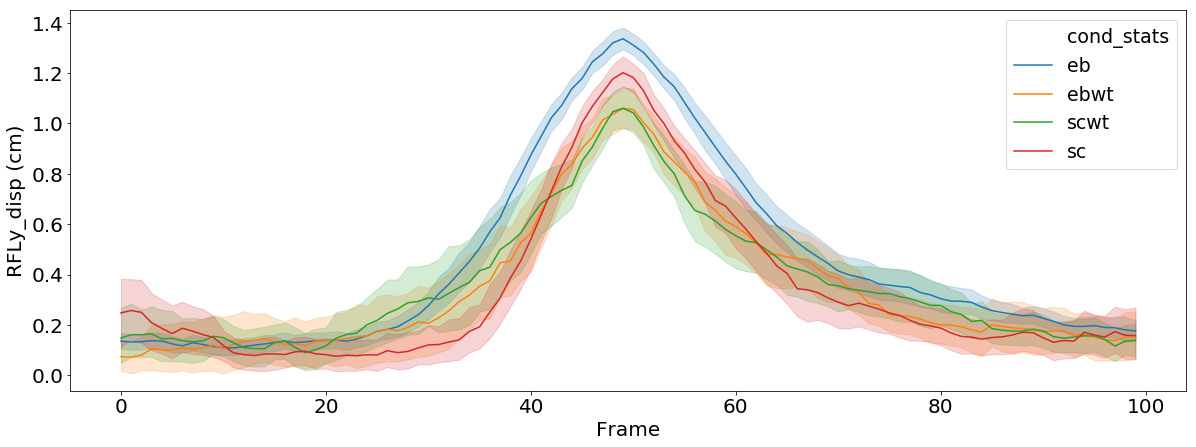

In [4]:
# this is overall with whiskers only data 
plt.rcParams['figure.figsize']=(20,7)
my_pal= {'EB':'mediumblue','SC':'crimson'}
sns.lineplot(x="x_vals", y="RFLy_disp",hue = 'cond_stats',data=re_concat)
plt.xlabel('Frame', fontsize=20)
plt.ylabel('RFLy_disp (cm)', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.legend(loc=1, prop={'size': 19})

#plt.savefig('Test_Combine_Forelimb_Average.pdf')

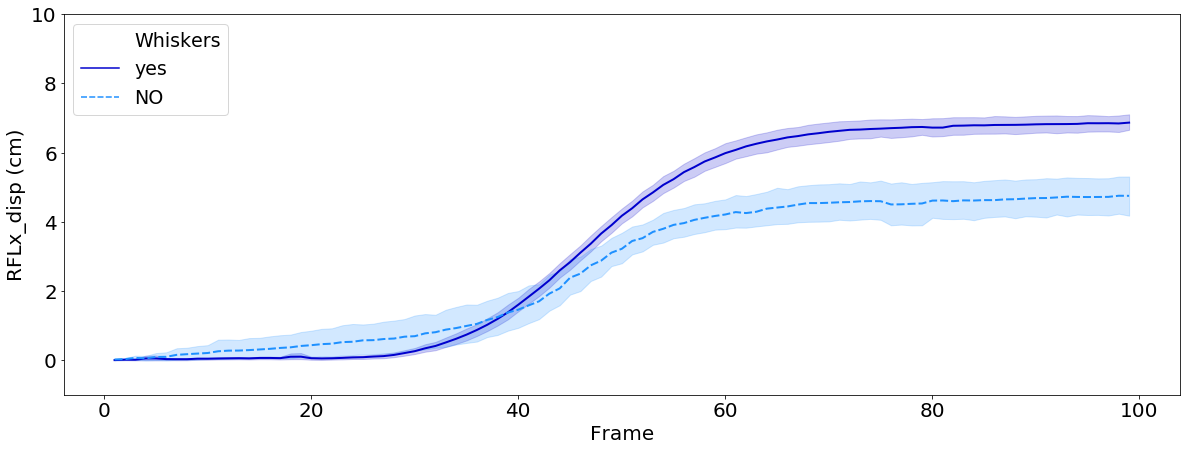

In [5]:
# Whiskers do change the X-component of motion in EB animals, with shorter steps 
my_pal= {'yes':'mediumblue','NO':'dodgerblue'}
plt.rcParams['figure.figsize']=(20,7)
af = sns.lineplot(x="x_vals", y="RFLx_cumsum_scale",hue = 'Whiskers',
             style = 'Whiskers',linewidth=2,data=eb_only_correct,palette = my_pal)
af.set_ylim(-1,10)
plt.xlabel('Frame', fontsize=20)
plt.ylabel('RFLx_disp (cm)', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.legend(loc=2, prop={'size': 19})

#plt.savefig('Test_Combine_EB_Forelimb_x.pdf')

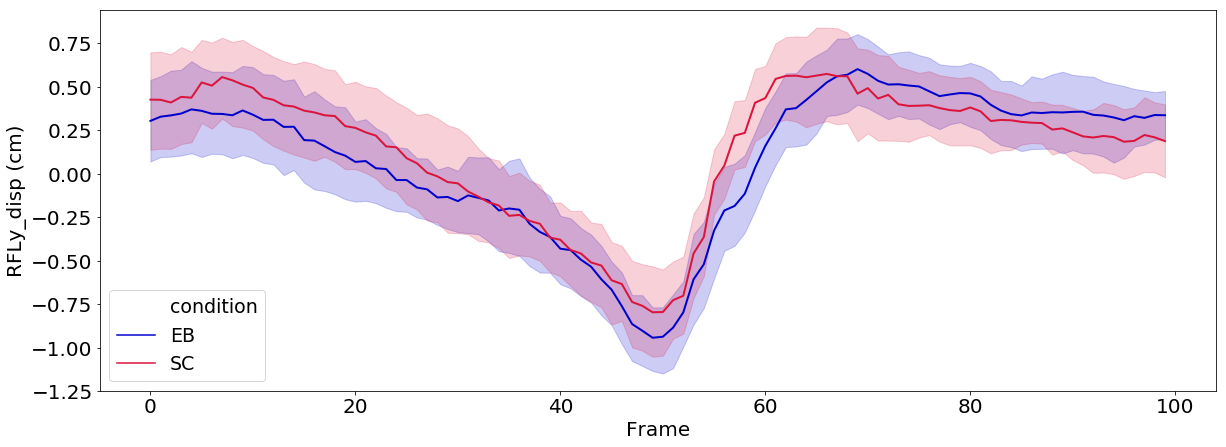

In [6]:
#the trajectory of misses is similar across conditions
plt.rcParams['figure.figsize']=(20,7)
my_pal= {'EB':'mediumblue','SC':'crimson'}
dlc_miss = sns.lineplot(x="x_vals", y="RFLy_disp",hue = 'condition',
                        linewidth = 2, data=agg_miss,palette = my_pal)

plt.xlabel('Frame', fontsize=20)
plt.ylabel('RFLy_disp (cm)', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.legend(loc=3, prop={'size': 19})

#plt.savefig('Test_Combine_Forelimb_Miss.pdf')

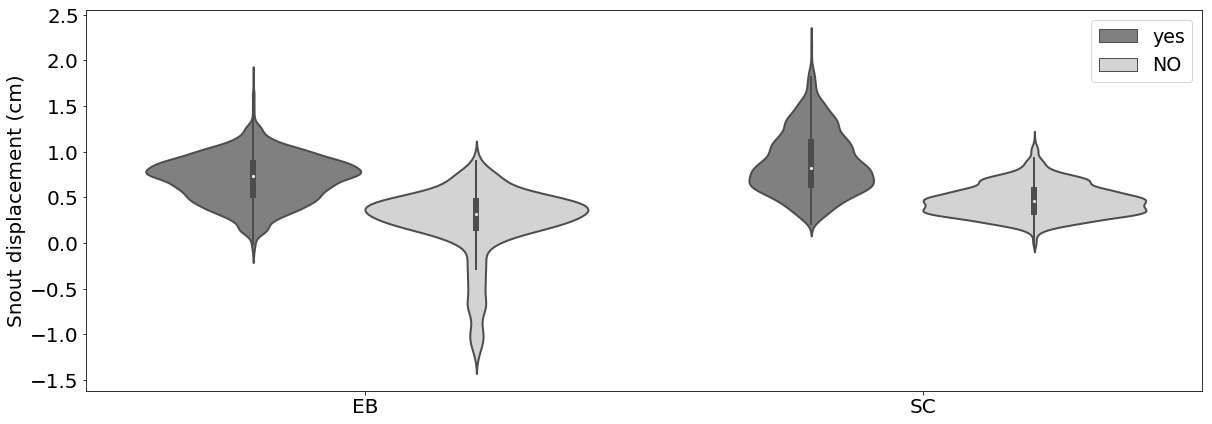

In [7]:
plt.rcParams['figure.figsize']=(20,7)
my_pal= {'EB':'mediumblue','SC':'crimson','yes':'gray','NO':'lightgray'}
sns.violinplot(x='condition',y='Snouty_disp_scale',hue='Whiskers',style='Whiskers',
             linewidth =2,data=agg_data,palette=my_pal)

plt.xlabel('', fontsize=1)
plt.ylabel('Snout displacement (cm)', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.legend(loc=1, prop={'size': 19})

#plt.savefig('Test_Combine_Snout.pdf')

#Example of stats you can run:
#ladtest_model = smf.ols(formula = 'Snouty_disp_scale ~ condition', 
#                        data = whiskers_only)
#result_of_anova = ladtest_model.fit()
#print(result_of_anova.summary())

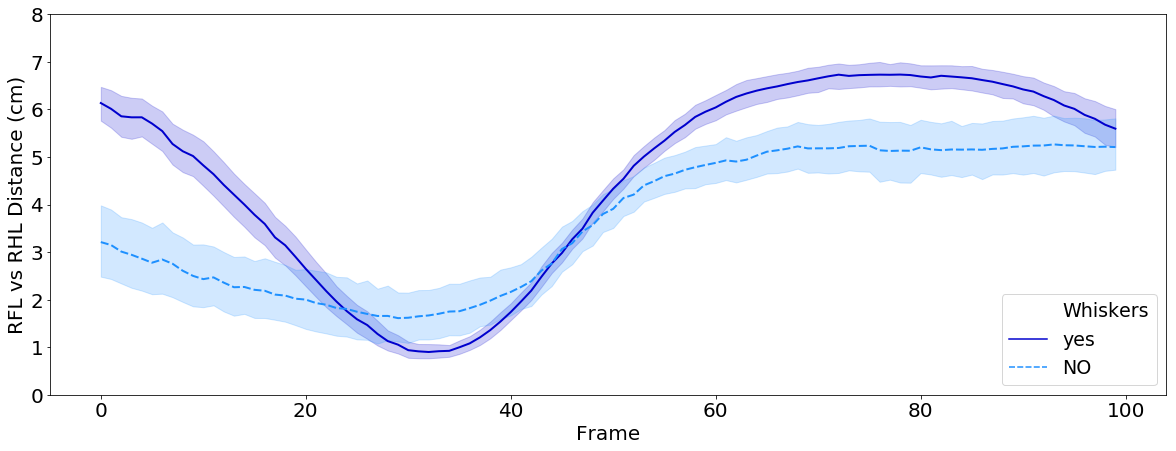

In [8]:
my_pal= {'yes':'mediumblue','NO':'dodgerblue'}
plt.rcParams['figure.figsize']=(20,7)
a= sns.lineplot(x="x_vals", y="RFL_vs_RHL_scale",hue = 'Whiskers',style='Whiskers',
             linewidth =2,data=eb_only_correct,palette = my_pal)
a.set_ylim(0,8)

plt.xlabel('Frame', fontsize=20)
plt.ylabel('RFL vs RHL Distance (cm)', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.legend(loc=4, prop={'size': 19})

#plt.savefig('Test_Combine_RFL_RHL_EB.pdf')


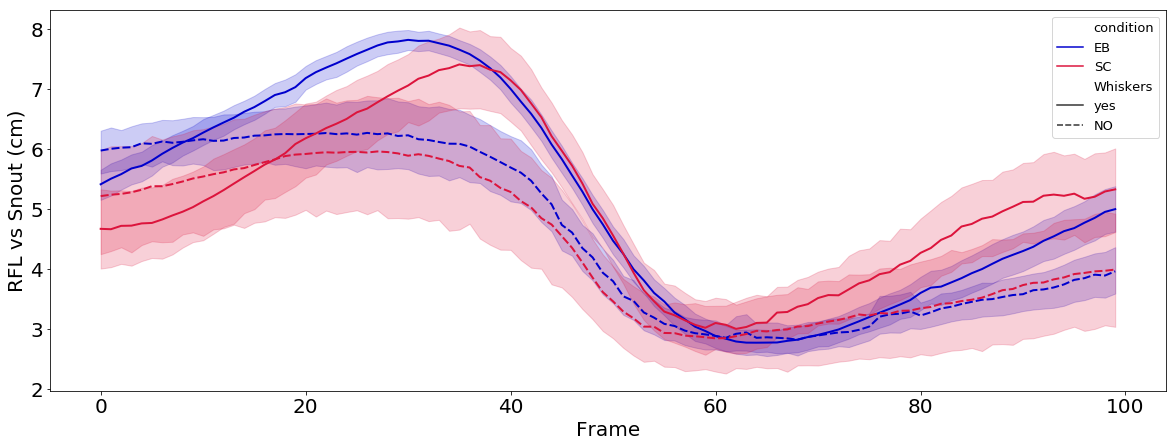

In [9]:
# trimming the whiskers results in a less regular snout to forelimb movement (not willing to reach as far out)
my_pal= {'EB':'mediumblue','SC':'crimson'}
plt.rcParams['figure.figsize']=(20,7)
sns.lineplot(x="x_vals", y="RFL_vs_Snout",hue = 'condition',style='Whiskers',
             linewidth =2,data=agg_data,palette = my_pal)

plt.xlabel('Frame', fontsize=20)
plt.ylabel('RFL vs Snout (cm)', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.legend(loc=1, prop={'size': 13})

#plt.savefig('Test_Combine_RFL_Snout_EB.pdf')

In [10]:
#agg_data2 = pd.concat([your_data1,your_data2,your_data3])
# or use pre-existing data
agg_data2 = pd.concat([eleven_,joyce_,max_,dustin_,billy_,lucas_,will_,mike_])

# Then need to rename the strikes so it gives us strikes 1 thru 71
# 100 is the width of each strike 
val = 0 
agg_data2['strike'] = [val + floor(i / 100) for i in range(len(agg_data2.index))] 
listit = list(range(100))

#SELECTS JUST Forelimb Data
cluster_data = agg_data2[['x_vals','strike','RFLy_disp_scale']]
cluster_pivot = cluster_data.pivot(index='x_vals',columns='strike',values ='RFLy_disp_scale')
cluster_pivot_array = cluster_pivot.values

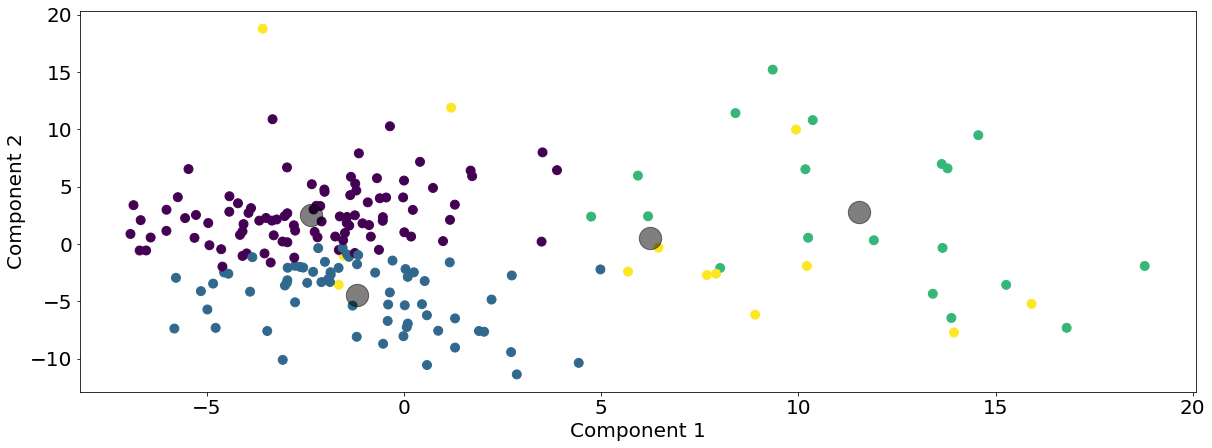

In [11]:
# Now run the PCA

mean_pivot = np.mean(cluster_pivot_array)
cluster_pivot_scaled = cluster_pivot_array - mean_pivot
#enuc_pivot_array.shape
cluster_try = cluster_pivot.T
cluster_try_array = cluster_try.values


# Apply min-max scaling or pick a different scaler
#scaler= sk.preprocessing.MinMaxScaler()
scaler =sk.preprocessing.StandardScaler()
#scaler = sk.preprocessing.RobustScaler()
#scaler = sk.preprocessing.Normalizer()
dataset_scaled = scaler.fit_transform(cluster_try_array)


# choose number of components
pca=PCA(n_components=4)
pca_result = pca.fit_transform(dataset_scaled)


#Use K-Means for visualization 
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_result)
y_kmeans = kmeans.predict(pca_result)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_kmeans, s=80)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

plt.xlabel('Component 1', fontsize=20)
plt.ylabel('Component 2', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

#plt.savefig('Test_Component_Plot.pdf')


1 : 2.9496330718667156
2 : 2.3007154767061855
3 : 2.1133634552083866
4 : 2.017981491176881
5 : 1.9044551284467144
6 : 1.8582707251179453
7 : 1.7926789329111568
8 : 1.7569230154991515
9 : 1.7250266755687775


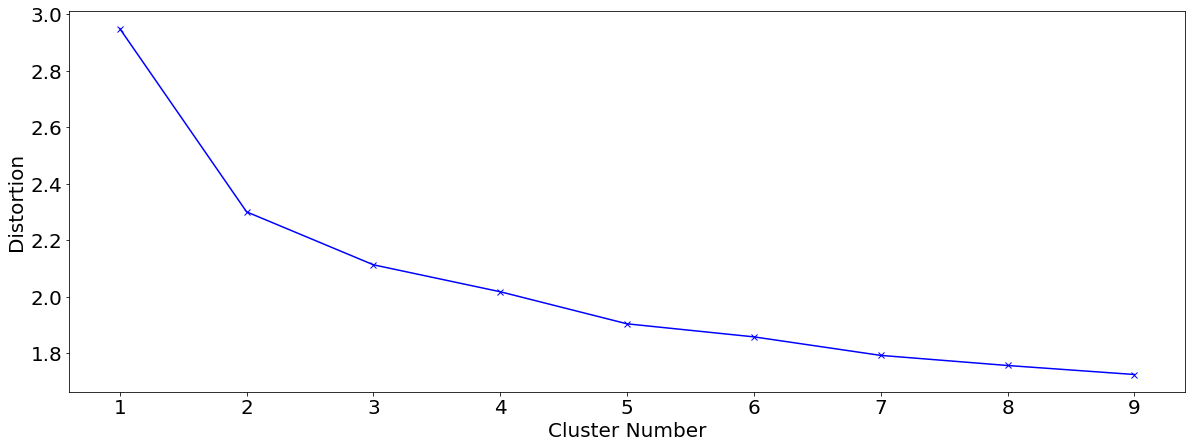

In [12]:
# Based on code from:
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
# Elbow point method 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) # Input the number of desired clusters here
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(cluster_try_array) 
    kmeanModel.fit(cluster_try_array)     
      
    distortions.append(sum(np.min(cdist(cluster_try_array, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cluster_try_array.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cluster_try_array, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cluster_try_array.shape[0] 
    mapping2[k] = kmeanModel.inertia_
    

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))
    
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Cluster Number', fontsize=20)
plt.ylabel('Distortion', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
#plt.savefig('Test_Combine_elbow_point.pdf')
plt.show()

In [13]:
#Silhouette Coefficient

import csv 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

range_n_clusters = [2,3,4,5,6]

for i in range_n_clusters:
    clusterer = KMeans(n_clusters=i,random_state = 10)
    cluster_labels = clusterer.fit_predict(cluster_try_array)
    silhouette_avg = silhouette_score(cluster_try_array, cluster_labels)
    print('For',i,'clusters',
         'average silhouette score is:',silhouette_avg)
    

For 2 clusters average silhouette score is: 0.5395639001439393
For 3 clusters average silhouette score is: 0.1898386826159059
For 4 clusters average silhouette score is: 0.1908493427397461
For 5 clusters average silhouette score is: 0.1928397300008032
For 6 clusters average silhouette score is: 0.18414936956432917


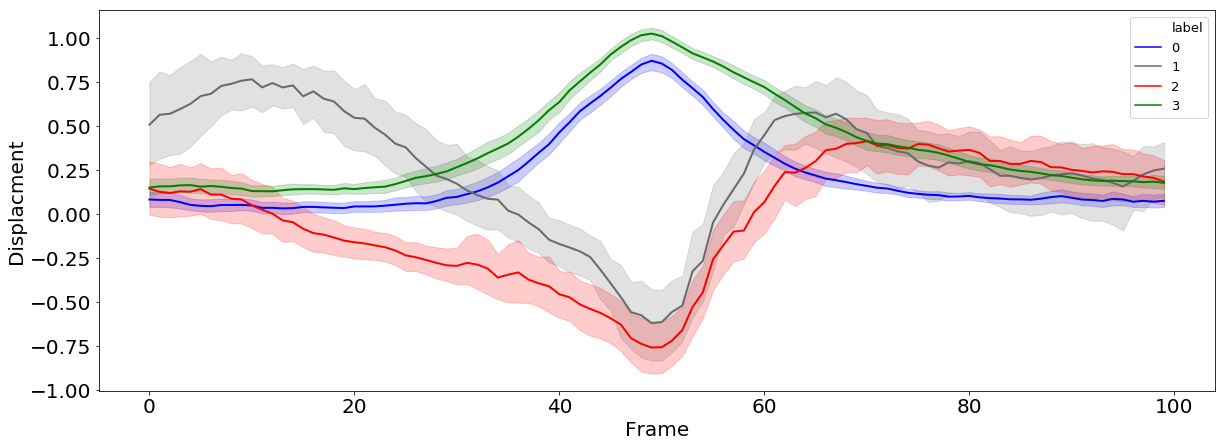

In [14]:
# Run clustering, add labels, and plot

kk = KMeans(n_clusters=4)
kk.fit(cluster_try_array)
y_kk= kk.predict(cluster_try_array)

result= kk.labels_
cluster_try['label']=result


cluster_long = pd.melt(cluster_try,id_vars=[('label')],var_name='x_vals',value_name='disp')

import seaborn as sns
my_pal = {0:'blue',1:'dimgray',2:'red',3:'green'}
plt.rcParams['figure.figsize']=(20,7)
km=sns.lineplot(x="x_vals", y="disp",hue = 'label',linewidth=2,data=cluster_long,
                palette=my_pal)

plt.xlabel('Frame', fontsize=20)
plt.ylabel('Displacment', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.legend(loc=1, prop={'size': 13})

#km.set_ylim(-.2,1.3)
#plt.savefig('Test_Combine_k_means.pdf')

In [15]:
# and then you can save any data as a csv here.
# save your data: Possum_number_lighting_pattern_correctormiss
# cluster_long.to_csv('clustered_hits_and_misses.csv',index=False)  # rename files to suit data